In [7]:
## 1. Loading the dataset
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

import os
import pandas as pd

# Check the current working directory
print("Current Working Directory: ", os.getcwd())

# List the files in the current directory
print("Files and directories in the current directory:", os.listdir('.'))




# Modify the path to go up two levels and then into the data/Dataset directory
data = pd.read_csv('../data/Dataset/emergency_classification.csv')


print(data.head())


Current Working Directory:  /Users/paramanandbhat/Documents/GitHub/React/Improving-Deep-Learning-Model/notebook
Files and directories in the current directory: ['earlystopping.ipynb', '.ipynb_checkpoints']
  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1


In [9]:

# create random number generator
seed = 42
rng = np.random.RandomState(seed)

# load images and store it in numpy array
# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values


# shape of the images
print(X.shape)


(2352, 224, 224, 3)


In [11]:
## 2. Pre-processing the data
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
print(X.shape)

# minimum and maximum pixel values of images
X.min(), X.max()

print(X.min(), X.max())

# normalizing the pixel values
X = X / X.max()


# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

print(X.min(), X.max())


(2352, 150528)
0.0 1.0
0.0 1.0


In [12]:
## 3. Creating training and validation set
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)


(((1646, 150528), (1646,)), ((706, 150528), (706,)))

In [13]:
## 4. Defining the model architecture
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
from keras.optimizers import Adam
# compiling the model\
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)
# Compile the model and specify the optimizer (Adam) correctly
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])



2024-02-03 15:19:17.984356: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-03 15:19:17.984481: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-03 15:19:17.984516: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-03 15:19:17.984992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-03 15:19:17.985320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
## 6. Setting up Early Stopping

# importing module for early stopping
from keras.callbacks import EarlyStopping

# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')


Epoch 1/100


2024-02-03 15:20:06.113477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-03 15:20:06.148245: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 3s 219ms/step - loss: 0.7068 - accuracy: 0.5158 - val_loss: 0.7075 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 79ms/step - loss: 0.6833 - accuracy: 0.5863 - val_loss: 0.6858 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 74ms/step - loss: 0.6807 - accuracy: 0.5863 - val_loss: 0.6870 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 72ms/step - loss: 0.6786 - accuracy: 0.5863 - val_loss: 0.6885 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 1s 74ms/step - loss: 0.6789 - accuracy: 0.5863 - val_loss: 0.6861 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6783 - accuracy: 0.5863 - val_loss: 0.6878 - val_accuracy: 0.5609
Epoch 7/100
23/23 [==============================] - 1s 16ms/step
Accuracy on validation set: 56.09065155807366 %


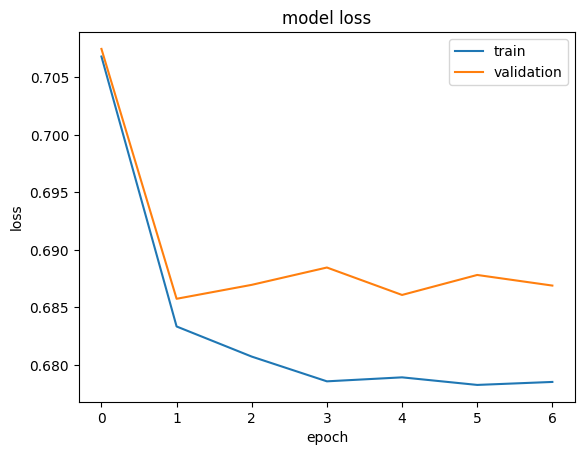

In [15]:
## 7. Training the model using Early Stopping
# training the model for 100 epochs
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])
from sklearn.metrics import accuracy_score

# Assuming binary classification
# accuracy on validation set
accuracy = accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype(int))
print('Accuracy on validation set:', accuracy * 100, '%')

 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [16]:
## Hyperparameter tuning for Early Stopping (Increasing the patience value)

# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])


accuracy = accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype(int))
print('Accuracy on validation set:', accuracy * 100, '%')


Epoch 1/100


2024-02-03 15:22:03.915653: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 3s 184ms/step - loss: 0.6968 - accuracy: 0.5802 - val_loss: 0.6880 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 78ms/step - loss: 0.6807 - accuracy: 0.5863 - val_loss: 0.6944 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 74ms/step - loss: 0.6792 - accuracy: 0.5863 - val_loss: 0.6858 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 75ms/step - loss: 0.6815 - accuracy: 0.5863 - val_loss: 0.6865 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 1s 77ms/step - loss: 0.6813 - accuracy: 0.5863 - val_loss: 0.6938 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 1s 74ms/step - loss: 0.6837 - accuracy: 0.5863 - val_loss: 0.6858 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6789 - accuracy: 0.5863 - val_loss: 0.6869 - val_accuracy: 0.5609
Epoch 8/100
13/13

23/23 [==============================] - 0s 13ms/step
Accuracy on validation set: 56.09065155807366 %


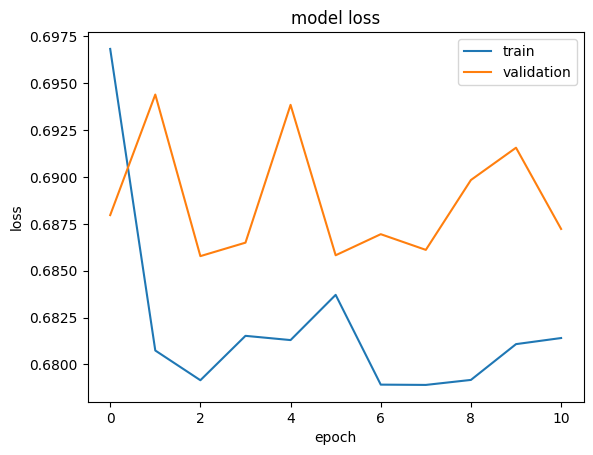

In [17]:
# Assuming binary classification
y_pred = model.predict(X_valid)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_valid, y_pred_classes)
print('Accuracy on validation set:', accuracy * 100, '%')
# accuracy on validation set
# accuracy on validation set

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()